In [1]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re

In [2]:
dataset=pd.read_csv('spam.csv',encoding = "latin-1")

In [3]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
dataset=dataset.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])
dataset=dataset.rename(columns={"v1" : "Target" , "v2" : "Message"})
dataset["Length"]=dataset["Message"].str.len()

In [5]:
dataset.head(10)

,Target,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,158
9,spam,Had your mobile 11 months or more? U R entitle...,154


In [6]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
Target     5572 non-null object
Message    5572 non-null object
Length     5572 non-null int64
dtypes: int64(1), object(2)
memory usage: 130.7+ KB
None


ham     4825
spam     747
Name: Target, dtype: int64


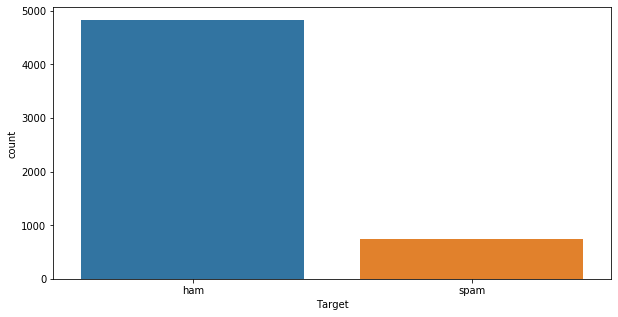

In [7]:
# How many spam messages and ham messages in the dataset
plt.figure(figsize=(10,5))
# seaborn: statistical data visualization
sns.countplot(data=dataset,x="Target")
print(dataset["Target"].value_counts())

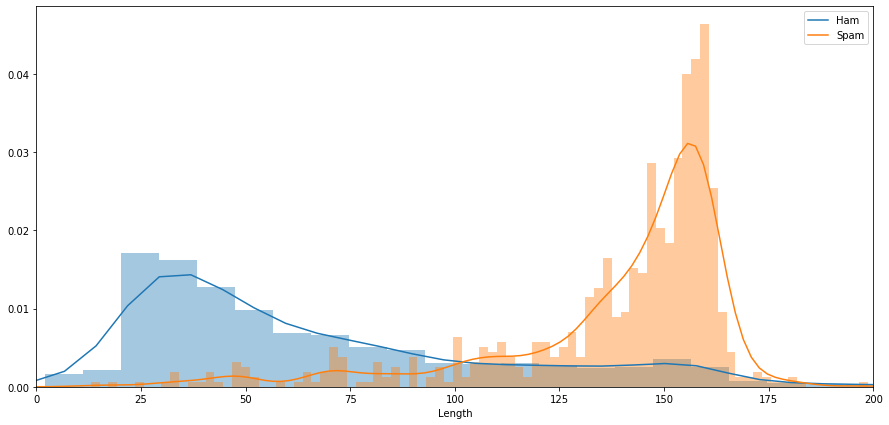

In [8]:
# we understand from this figure that the spam messages tends to have the large length more than ham messages
plt.figure(figsize=(15,7))
plt.xlim(0,200)
sns.distplot(dataset.loc[dataset["Target"]=="ham"]["Length"],kde_kws={"label":"Ham"},bins=100)
sns.distplot(dataset.loc[dataset["Target"]=="spam"]["Length"],kde_kws={"label":"Spam"},bins=100)


In [9]:
data1=dataset.copy()
data1.head()

,Target,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Preprocess the dataset

In [10]:
# Firstly we need to convert the column Target to binary data as 0 and 1
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y=encoder.fit_transform(data1['Target'])
data1['Target']=y

In [11]:
data1.head()

,Target,Message,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
text_messages=data1['Message']
#print(text_messages[:10])

In [13]:
# Secondly we will clean the data for alot of something
Email=r'^.+@.*\.[A-Za-z0-9]{2,}$'
Url=r'^http://\S*'
MoneySymbol=r'\u20AC|\$'
NormalNumber=r'\d+(\.\d+)?'
PhoneNumber=r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$'
Punctuation=r'[^\w\d\s]'
StopWords = set(stopwords.words('english'))
def Clean_Data(text):
    text=re.sub(Email,"",text)
    text=re.sub(Url,"",text)
    text=re.sub(MoneySymbol,"moneysymb",text)
    text=re.sub(PhoneNumber,"phonenumber",text)
    text=re.sub(NormalNumber,"number",text)
    text=re.sub(Punctuation,"",text)
    text=str.lower(text)
    text=[nltk.PorterStemmer().stem(w)  for w in text.split() if w not in StopWords]
    return " ".join(text)


In [14]:
CleanMessages=[Clean_Data(w) for w in data1.Message]

In [15]:
data1['Message']=CleanMessages

In [16]:
data1.head()

,Target,Message,Length
0,0,go jurong point crazi avail bugi n great world...,111
1,0,ok lar joke wif u oni,29
2,1,free entri number wkli comp win fa cup final t...,155
3,0,u dun say earli hor u c alreadi say,49
4,0,nah dont think goe usf live around though,61


# Tokenization

In [17]:
from  nltk.tokenize import word_tokenize
tokenizer = nltk.tokenize.WhitespaceTokenizer()
data1['Tokenized'] = data1['Message'].apply(tokenizer.tokenize)

In [18]:
from nltk.util import bigrams
data1['Tokenized'].apply(lambda row: list(nltk.ngrams(row, 2)))

0       [(go, jurong), (jurong, point), (point, crazi)...
1       [(ok, lar), (lar, joke), (joke, wif), (wif, u)...
2       [(free, entri), (entri, number), (number, wkli...
3       [(u, dun), (dun, say), (say, earli), (earli, h...
4       [(nah, dont), (dont, think), (think, goe), (go...
5       [(freemsg, hey), (hey, darl), (darl, number), ...
6       [(even, brother), (brother, like), (like, spea...
7       [(per, request), (request, mell), (mell, mell)...
8       [(winner, valu), (valu, network), (network, cu...
9       [(mobil, number), (number, month), (month, u),...
10      [(im, gonna), (gonna, home), (home, soon), (so...
11      [(six, chanc), (chanc, win), (win, cash), (cas...
12      [(urgent, number), (number, week), (week, free...
13      [(ive, search), (search, right), (right, word)...
14                                       [(date, sunday)]
15      [(xxxmobilemovieclub, use), (use, credit), (cr...
16                              [(oh, kim), (kim, watch)]
17      [(eh, 

In [19]:
data1['Tokenized'].apply(lambda row: list(nltk.ngrams(row, 3)))

0       [(go, jurong, point), (jurong, point, crazi), ...
1       [(ok, lar, joke), (lar, joke, wif), (joke, wif...
2       [(free, entri, number), (entri, number, wkli),...
3       [(u, dun, say), (dun, say, earli), (say, earli...
4       [(nah, dont, think), (dont, think, goe), (thin...
5       [(freemsg, hey, darl), (hey, darl, number), (d...
6       [(even, brother, like), (brother, like, speak)...
7       [(per, request, mell), (request, mell, mell), ...
8       [(winner, valu, network), (valu, network, cust...
9       [(mobil, number, month), (number, month, u), (...
10      [(im, gonna, home), (gonna, home, soon), (home...
11      [(six, chanc, win), (chanc, win, cash), (win, ...
12      [(urgent, number, week), (number, week, free),...
13      [(ive, search, right), (search, right, word), ...
14                                                     []
15      [(xxxmobilemovieclub, use, credit), (use, cred...
16                                     [(oh, kim, watch)]
17      [(eh, 

In [20]:
from nltk.tokenize import word_tokenize
allwords=[]
for message in CleanMessages:
    words=word_tokenize(message)
    for w in words:
        allwords.append(w)

In [21]:
# Apply the frequency distributions after we tokenized the messages
freqdist = nltk.FreqDist(allwords)
print(freqdist)
print("Most Common Words {}".format(freqdist.most_common(15)))

<FreqDist with 7342 samples and 52411 outcomes>
Most Common Words [('number', 2340), ('u', 1119), ('call', 653), ('im', 463), ('go', 449), ('get', 446), ('ur', 384), ('come', 297), ('dont', 279), ('ok', 277), ('ltgt', 276), ('free', 275), ('know', 270), ('like', 255), ('got', 250)]


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [23]:
X=data1['Message']
y=data1['Target']

In [24]:
Message_train,Message_test,y_train,y_test=train_test_split(X,y, test_size=0.25, random_state=1000)

In [25]:
print("X_train_shape(messages) : {}".format(Message_train.shape[0]))
print("y_train_shape(messages) : {}".format(y_train.shape[0]))
print("X_test_shape(label) : {}".format(Message_test.shape[0]))
print("y_test_shape(label) : {}".format(y_test.shape[0]))

X_train_shape(messages) : 4179
y_train_shape(messages) : 4179
X_test_shape(label) : 1393
y_test_shape(label) : 1393


In [26]:
# Create Bag Of Words
vectorizer = CountVectorizer()
vectorizer.fit(Message_train)
X_train=vectorizer.transform(Message_train)
X_test=vectorizer.transform(Message_test)

In [27]:
len(vectorizer.vocabulary_)

6205

In [28]:
from sklearn.linear_model import LogisticRegression
def Classifier_logistic(X_train,y_train,X_test,y_test):
    classifier = LogisticRegression()
    classifier.fit(X_train,y_train)
    score = classifier.score(X_test, y_test)
    print("Accuracy:", score)
    return classifier

In [29]:
classifier_logistic=Classifier_logistic(X_train,y_train,X_test,y_test)

Accuracy: 0.9741564967695621


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
#X_train.shape

(4179, 6205)

In [ ]:
#from keras.models import Sequential
#from keras import layers
